# Alpha gridsearch

In [ ]:
!pip install --upgrade seaborn

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import fnmatch
import os

In [ ]:
# Define the parent folder and the subfolder naming pattern
experiment_folder = "./alpha_gridsearch"
subfolder_pattern = "run_*_*_*"

# Initialize an empty list to store the dataframes
dfs = []

# Iterate over the subfolders and read each CSV file into a dataframe
for subfolder_name in os.listdir(experiment_folder):
    if fnmatch.fnmatch(subfolder_name, subfolder_pattern):
        #parse score dataframe
        csv_path = os.path.join(parent_folder, subfolder_name, "*.csv")
        score_file = f"{experiment_folder}/{subfolder_name}/{subfolder_name}.out"
        df = pd.read_csv(score_file, header=None, names=["family", "sp", "modeler", "tc", "col", "time"])
        #keep track of corresponding alphas 
        for alpha_name, alpha_str in zip(["alpha_flank", "alpha_single", "alpha_frag"], subfolder_name.split("_")[1:]):
            df[alpha_name] = float(alpha_str)
        dfs.append(df)

# Concatenate the dataframes into a single dataframe
result_df = pd.concat(dfs, ignore_index=True)

In [12]:
df_3d = pd.DataFrame()
n = 10
df_3d['x'] = np.random.normal(5, 1, size=n)
df_3d['y'] = np.random.normal(0, 0.1, size=n)
df_3d['z'] = np.random.normal(-1, 3, size=n)
df_3d['scores'] = np.random.uniform(0, 1, size=n)

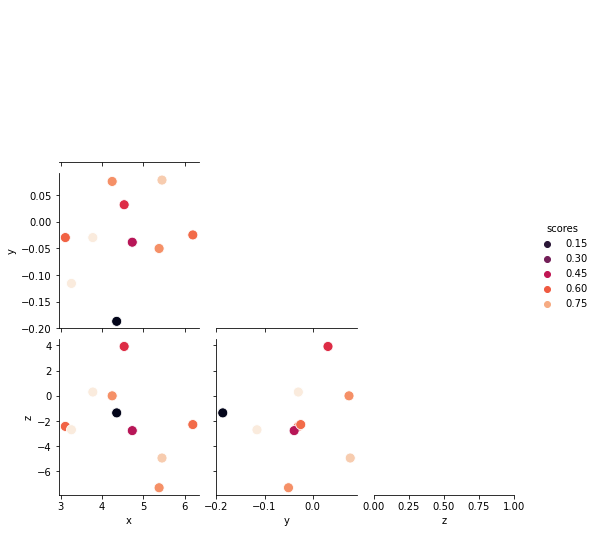

In [33]:
sns.pairplot(result_df, 
             vars=["alpha_flank", "alpha_single", "alpha_frag"], 
             hue="scores", 
             palette="rocket", 
             plot_kws=dict(s=100),
             corner=True)